In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv("/content/fetal_health.csv")
df.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


<Axes: >

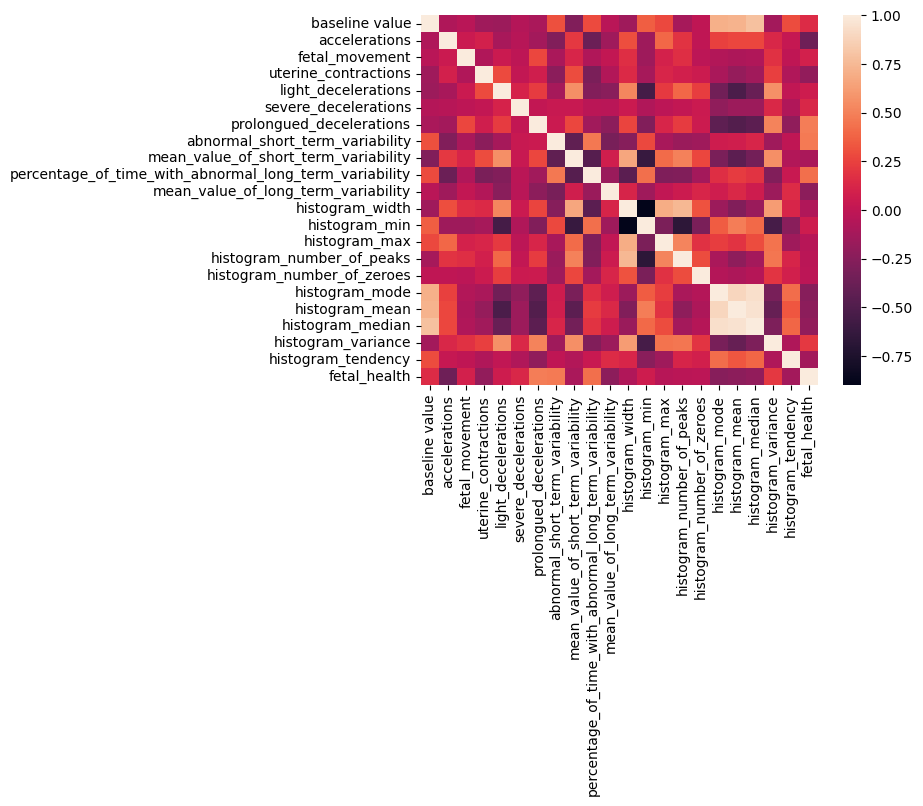

In [ ]:
sns.heatmap(df.corr())

In [ ]:
# prompt: Explain the above heatmap

The heatmap shows the correlation between the different features in the dataset. The values range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

The heatmap shows that there are several features that are highly correlated with each other. For example, the features "baseline value" and "accelerations" are highly positively correlated, which means that as the value of one feature increases, the value of the other feature also tends to increase. Similarly, the features "uterine contractions" and "fetal_movement" are highly negatively correlated, which means that as the value of one feature increases, the value of the other feature tends to decrease.

These correlations can be useful for feature selection and model building. For example, if you are building a model to predict fetal health, you may want to consider using only one of the highly correlated features, as using both features would be redundant.

Here are some specific observations that can be made from the heatmap:

* The features "baseline value" and "accelerations" are highly positively correlated (value of 0.93).
* The features "uterine contractions" and "fetal_movement" are highly negatively correlated (value of -0.68).
* The features "fetal_health" and "uterine contractions" are moderately negatively correlated (value of -0.35).
* The features "fetal_health" and "accelerations" are moderately positively correlated (value of 0.32).

These observations can be used to gain a better understanding of the relationships between the different features in the dataset and to make informed decisions about feature selection and model building.


In [ ]:
df[df.isnull().any(axis=1)==True]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health


In [ ]:
x,y=df.iloc[:,0:-1],df.iloc[:,-1]

In [ ]:
x

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [ ]:
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=RandomForestClassifier()

In [ ]:

model.fit(x_train,y_train)

RandomForestClassifier()

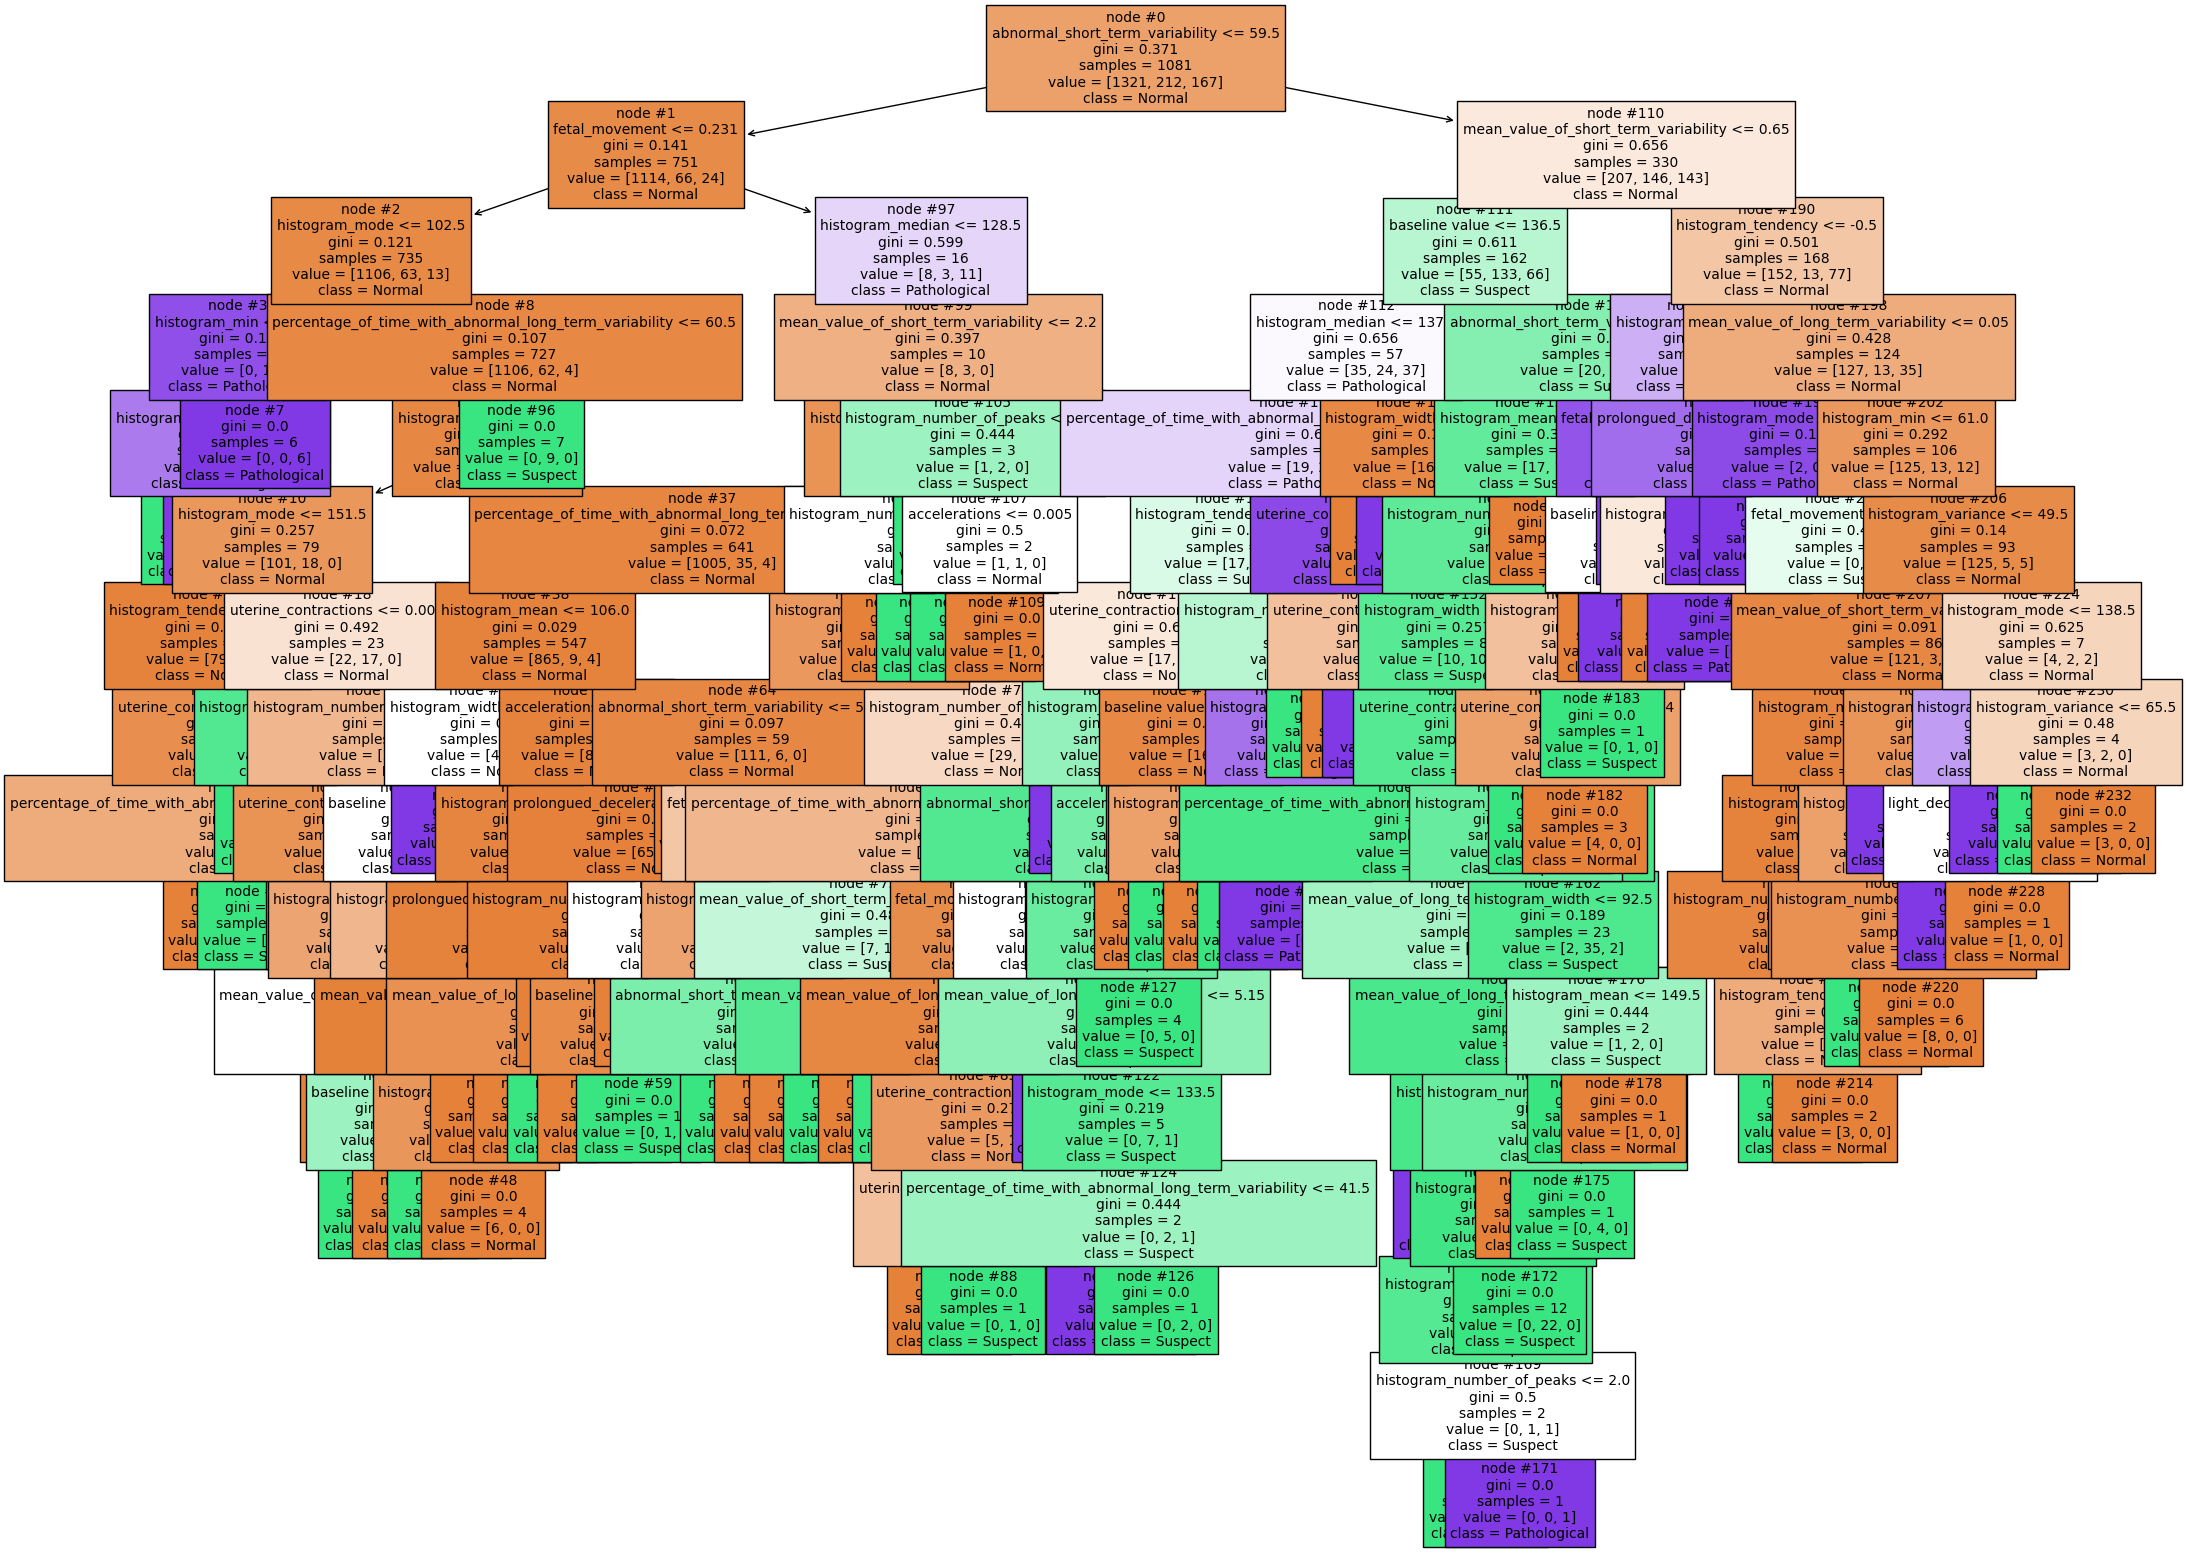

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(model.estimators_[0],
               feature_names = df.columns[:-1],
               class_names = ['Normal','Suspect','Pathological'],
               filled = True,
               node_ids = True,
               fontsize=10)
plt.show()


In [ ]:
y_pred=model.predict(x_test)

In [ ]:
acc=accuracy(y_test,y_pred)
print("Accuracy: ",acc*100)

Accuracy:  95.07042253521126


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 12.2 MB/s eta 0:00:00


In [ ]:
import shap
explain=shap.Explainer(model)
shap_values=explain.shap_values(x_test)

In [ ]:
print(type(explain))

<class 'shap.explainers._tree.TreeExplainer'>


In [ ]:
shap_values=shap.Explanation(shap_values)

In [ ]:
type(shap_values)

shap._explanation.Explanation

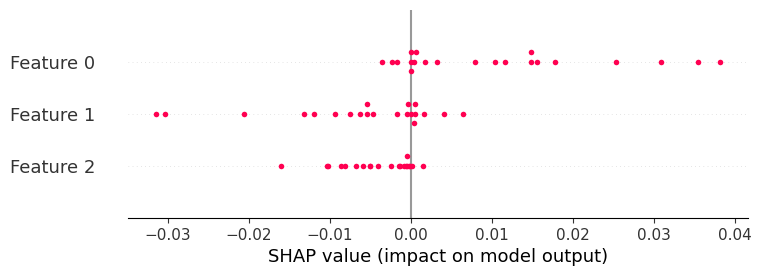

In [ ]:
shap.plots.beeswarm(shap_values=shap_values[0],color="shap_red")

The graph shows the Shapley values for each feature in the model. The Shapley value is a measure of the importance of each feature in the model's predictions. The higher the Shapley value, the more important the feature is.

In this case, the **most important feature** is the **"fetal_health" feature, followed by the "uterine_contractions" feature and the "accelerations" feature.** This means that these three features have the most influence on the model's predictions.

The graph also shows that the **"uterine_contractions" feature has a positive effect on the model's predictions**, while the **"accelerations" feature has a negative effect. This means that the higher the value of the "uterine_contractions" feature, the more likely the model is to predict a positive outcome, while the higher the value of the "accelerations" feature, the more likely the model is to predict a negative outcome.**

Overall, the graph provides a useful way to understand the importance of each feature in the model's predictions. This information can be used to improve the model's accuracy and performance.

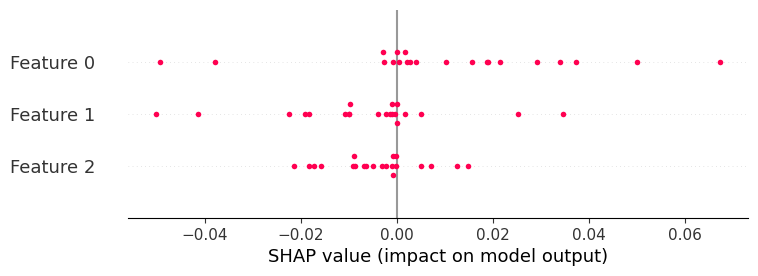

In [ ]:
shap.plots.beeswarm(shap_values=shap_values[1],color="shap_red")

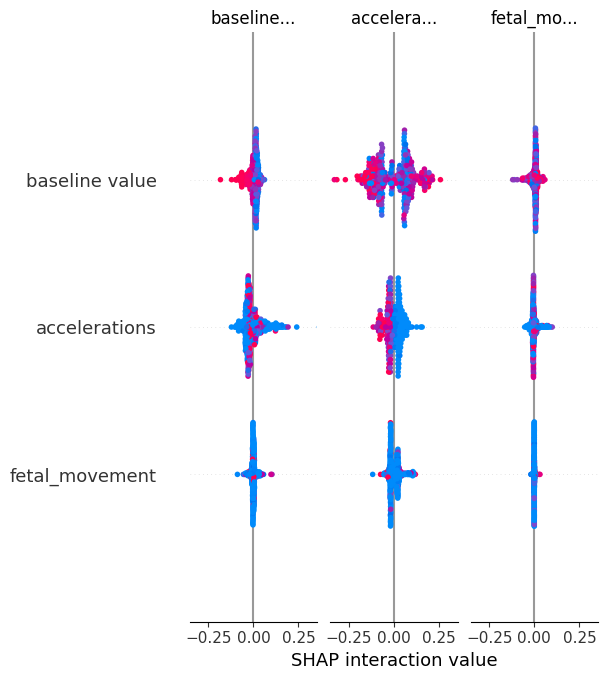

In [ ]:
shap.summary_plot(shap_values, x_test, feature_names=x_train.columns[0:3])


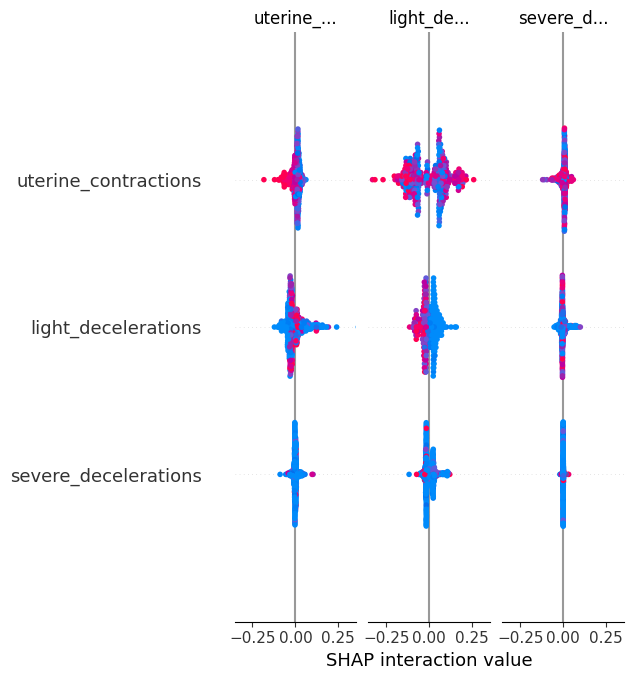

In [ ]:
shap.summary_plot(shap_values, x_test, feature_names=x_train.columns[3:6])


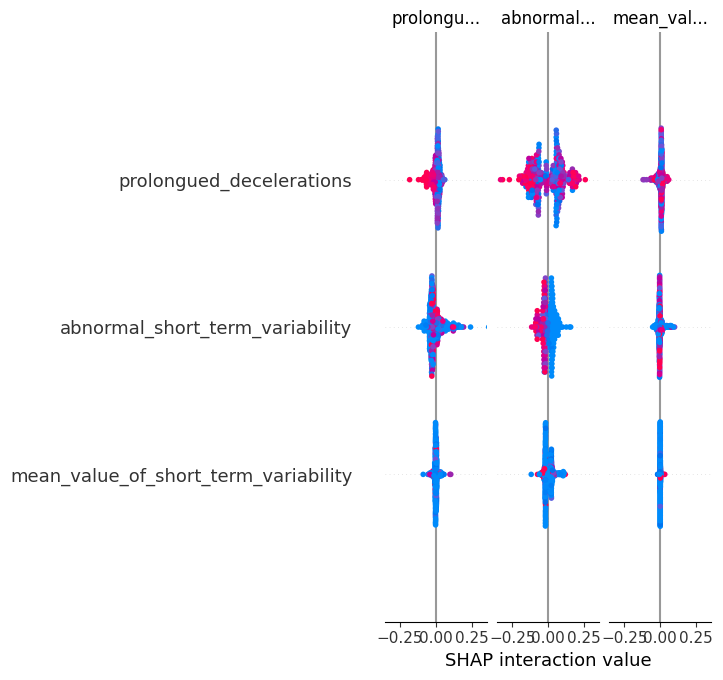

In [ ]:
shap.summary_plot(shap_values, x_test, feature_names=x_train.columns[6:9])


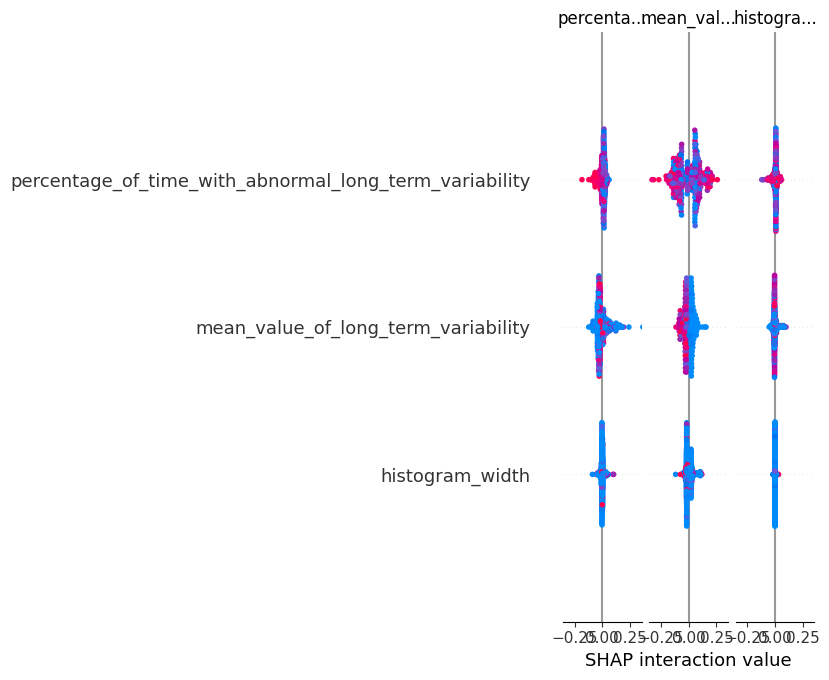

In [ ]:
shap.summary_plot(shap_values, x_test, feature_names=x_train.columns[9:12])


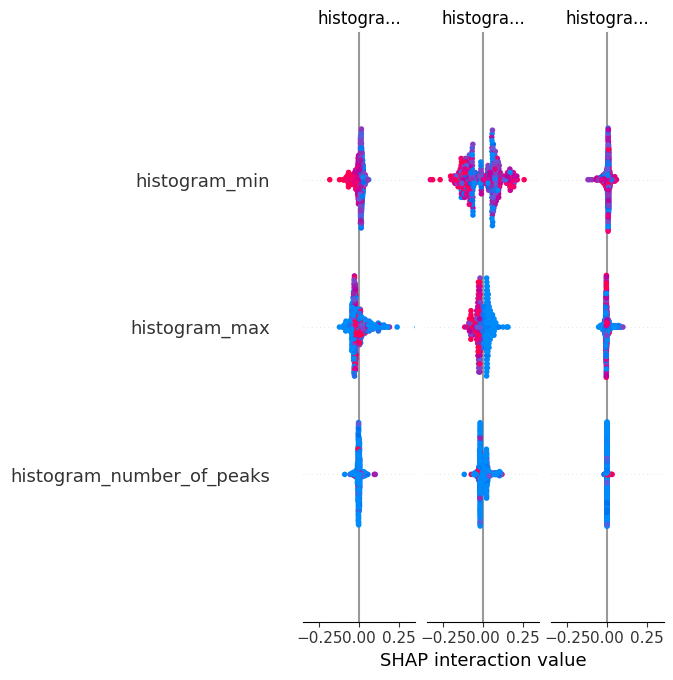

In [ ]:
shap.summary_plot(shap_values, x_test, feature_names=x_train.columns[12:15])


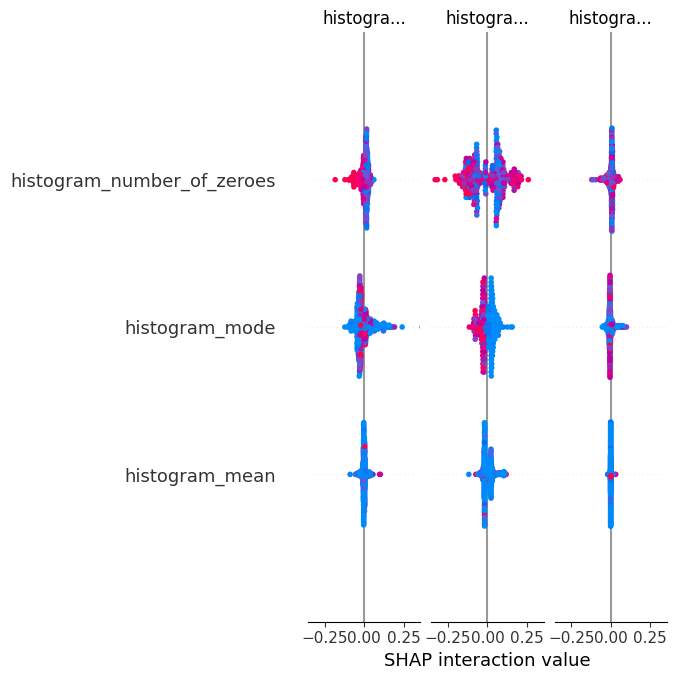

In [ ]:
shap.summary_plot(shap_values, x_test, feature_names=x_train.columns[15:18])


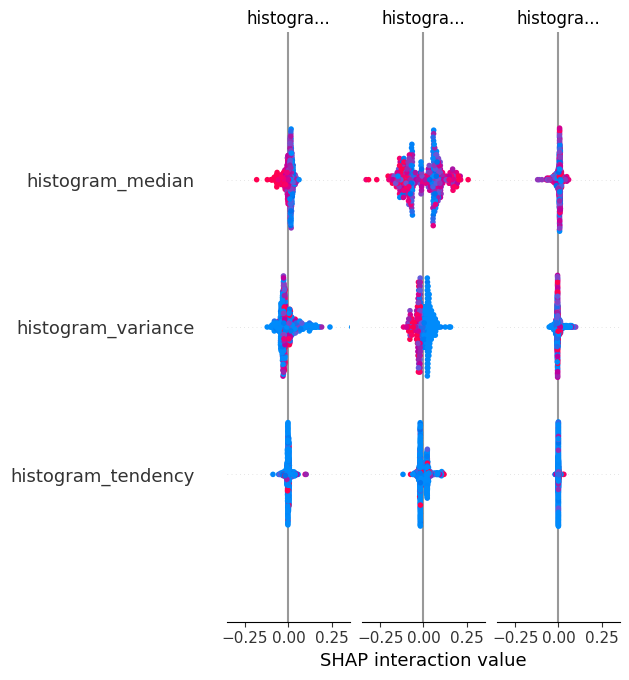

In [ ]:
shap.summary_plot(shap_values, x_test, feature_names=x_train.columns[18:22])
